In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

### Loading data

In [2]:
reviews=pd.read_excel('hotel_reviews.xlsx')
reviews

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5
20487,great location price view hotel great quick pl...,4
20488,"ok just looks nice modern outside, desk staff ...",2
20489,hotel theft ruined vacation hotel opened sept ...,1


In [3]:
reviews.shape

(20491, 2)

In [4]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


In [5]:
reviews.isnull().sum()

Review    0
Rating    0
dtype: int64

In [6]:
reviews.Rating.unique()

array([4, 2, 3, 5, 1], dtype=int64)

In [7]:
reviews.Rating.mean()

3.952222927138744

In [8]:
reviews.Rating.value_counts()

5    9054
4    6039
3    2184
2    1793
1    1421
Name: Rating, dtype: int64

### Number of reviews for each rating

<AxesSubplot: >

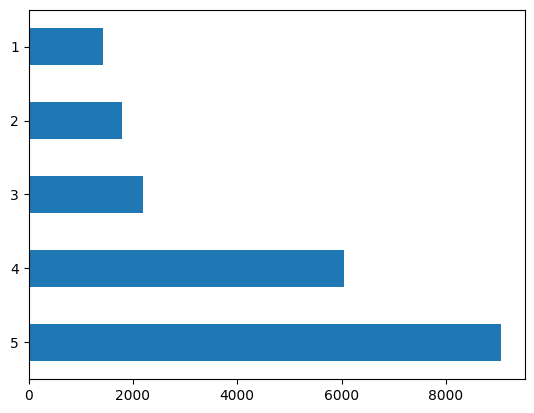

In [9]:
reviews['Rating'].value_counts().plot(kind='barh')

In [10]:
reviews['review_len'] = reviews.Review.apply(len)
reviews.head()

,Review,Rating,review_len
0,nice hotel expensive parking got good deal sta...,4,593
1,ok nothing special charge diamond member hilto...,2,1689
2,nice rooms not 4* experience hotel monaco seat...,3,1427
3,"unique, great stay, wonderful time hotel monac...",5,600
4,"great stay great stay, went seahawk game aweso...",5,1281


In [11]:
a=reviews.iloc[:,0].str.split(" ")
a

0        [nice, hotel, expensive, parking, got, good, d...
1        [ok, nothing, special, charge, diamond, member...
2        [nice, rooms, not, 4*, experience, hotel, mona...
3        [unique,, great, stay,, wonderful, time, hotel...
4        [great, stay, great, stay,, went, seahawk, gam...
                               ...                        
20486    [best, kept, secret, 3rd, time, staying, charm...
20487    [great, location, price, view, hotel, great, q...
20488    [ok, just, looks, nice, modern, outside,, desk...
20489    [hotel, theft, ruined, vacation, hotel, opened...
20490    [people, talking,, ca, n't, believe, excellent...
Name: Review, Length: 20491, dtype: object

In [12]:
length=[]
for i in a:
    length.append(len(i))
length

[89,
 252,
 219,
 91,
 193,
 136,
 103,
 87,
 61,
 37,
 49,
 54,
 86,
 72,
 29,
 216,
 244,
 146,
 24,
 158,
 173,
 23,
 48,
 131,
 37,
 72,
 44,
 72,
 159,
 36,
 39,
 63,
 88,
 83,
 49,
 85,
 136,
 40,
 64,
 50,
 120,
 62,
 26,
 58,
 39,
 211,
 72,
 73,
 56,
 39,
 47,
 86,
 66,
 30,
 133,
 111,
 63,
 216,
 38,
 126,
 58,
 57,
 58,
 100,
 80,
 18,
 78,
 217,
 28,
 16,
 34,
 236,
 90,
 54,
 38,
 131,
 60,
 38,
 45,
 125,
 108,
 21,
 115,
 103,
 47,
 73,
 56,
 96,
 152,
 225,
 43,
 23,
 228,
 73,
 143,
 29,
 87,
 84,
 131,
 126,
 54,
 92,
 167,
 110,
 64,
 81,
 226,
 49,
 230,
 49,
 209,
 28,
 122,
 130,
 53,
 105,
 73,
 18,
 28,
 56,
 30,
 126,
 65,
 75,
 34,
 70,
 70,
 46,
 114,
 106,
 128,
 79,
 130,
 84,
 116,
 83,
 162,
 88,
 206,
 107,
 27,
 28,
 52,
 88,
 81,
 39,
 147,
 34,
 41,
 26,
 86,
 49,
 154,
 192,
 77,
 37,
 41,
 112,
 73,
 51,
 51,
 68,
 44,
 150,
 23,
 43,
 368,
 79,
 59,
 67,
 34,
 33,
 94,
 56,
 65,
 23,
 206,
 124,
 60,
 111,
 61,
 169,
 36,
 55,
 66,
 81,
 51,
 56,


In [13]:
reviews['word_length']=length
reviews

,Review,Rating,review_len,word_length
0,nice hotel expensive parking got good deal sta...,4,593,89
1,ok nothing special charge diamond member hilto...,2,1689,252
2,nice rooms not 4* experience hotel monaco seat...,3,1427,219
3,"unique, great stay, wonderful time hotel monac...",5,600,91
4,"great stay great stay, went seahawk game aweso...",5,1281,193
...,...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5,733,111
20487,great location price view hotel great quick pl...,4,306,41
20488,"ok just looks nice modern outside, desk staff ...",2,443,65
20489,hotel theft ruined vacation hotel opened sept ...,1,5557,783


### Average review length - by letters and words

In [14]:
rating_length=reviews.groupby(["Rating"]).mean()
rating_length

,review_len,word_length
Rating,,
1,769.940183,114.365236
2,867.645287,128.598438
3,785.000000,116.705586
4,745.688690,109.771154
5,661.981445,95.962889


### length of reviews(letters)

<BarContainer object of 5 artists>

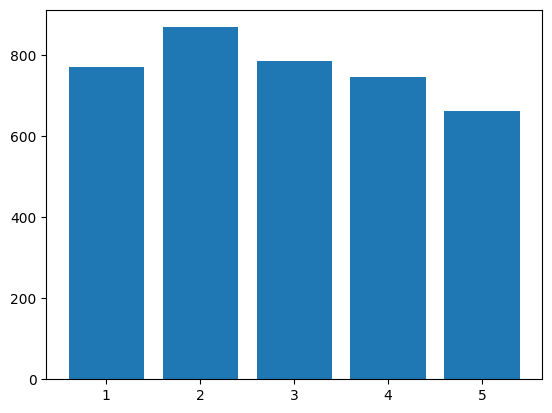

In [15]:
import matplotlib.pyplot as plt
plt.bar(rating_length.index,rating_length.review_len)

### Boxplots of the review length

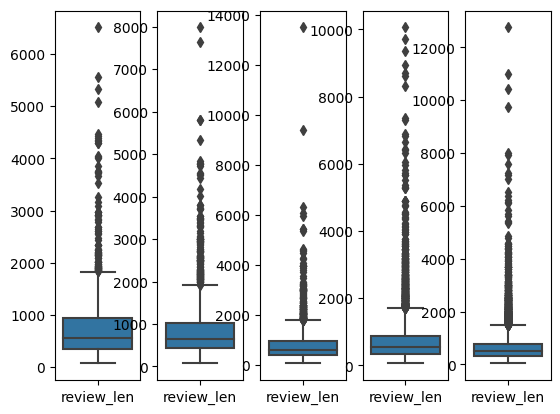

In [16]:
import seaborn as sns
fig, axes = plt.subplots(1,5)
for i in enumerate(axes):
    df1=pd.DataFrame()
    df1["review_len"]=reviews["review_len"].where(reviews["Rating"]==i[0]+1).dropna()
    sns.boxplot(df1,ax=i[1])


### Histogram of review length for each rating

Text(0.5, 0, 'Review Length')

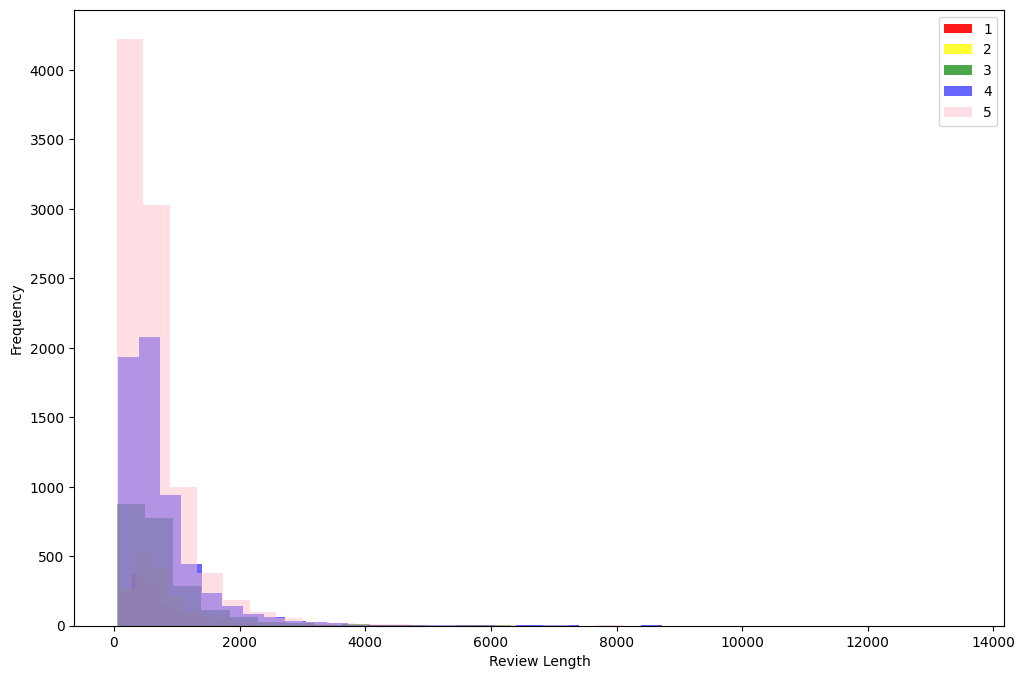

In [17]:
plt.figure(figsize=(12, 8))
colors=["red","yellow","green","blue","pink"]
for i in range(1,6):
    reviews[reviews.Rating==i].review_len.plot(bins=30,kind="hist",color=colors[i-1],label=i,alpha=1.0-i/10)
#sms[sms.label=='ham'].message_len.plot(bins=35, kind='hist', color='blue', label='Ham messages', alpha=0.6)
#sms[sms.label=='spam'].message_len.plot(kind='hist', color='red', label='Spam messages', alpha=0.6)
plt.legend()
plt.xlabel("Review Length")

### Distplot for each rating

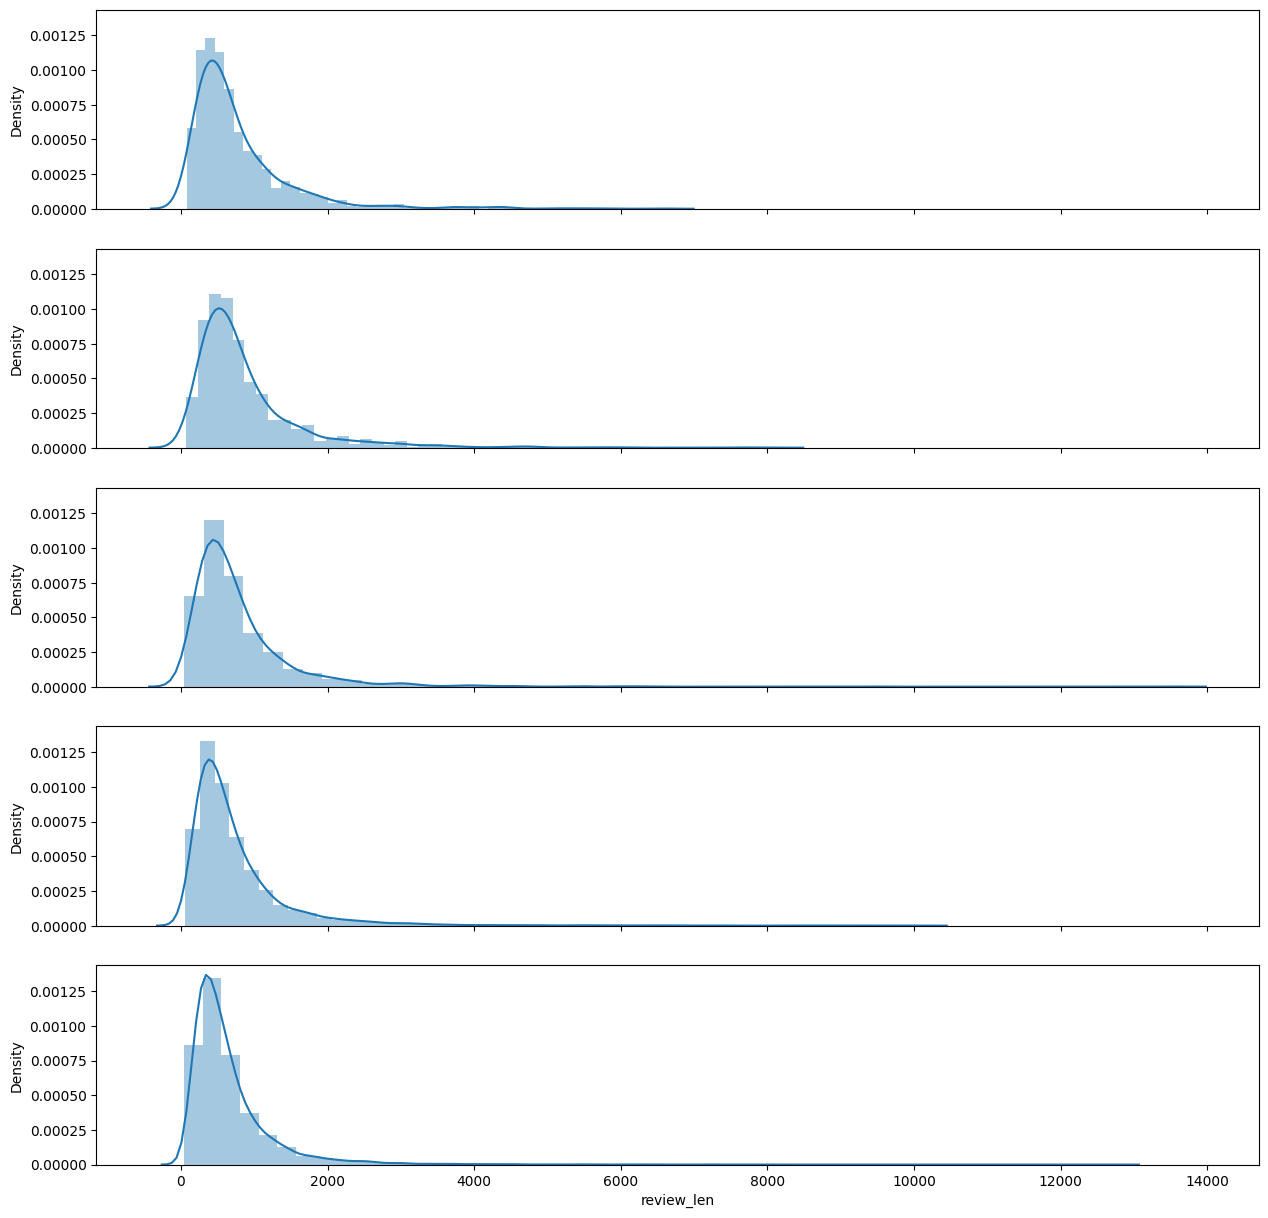

In [18]:
import seaborn as sns
fig, axes = plt.subplots(5,1,sharex='col', sharey='col')
fig.set_figheight(15)
fig.set_figwidth(15)
for i in enumerate(axes):
    sns.distplot(reviews[reviews.Rating==i[0]+1].iloc[:,2],ax=i[1])


In [19]:
reviews

,Review,Rating,review_len,word_length
0,nice hotel expensive parking got good deal sta...,4,593,89
1,ok nothing special charge diamond member hilto...,2,1689,252
2,nice rooms not 4* experience hotel monaco seat...,3,1427,219
3,"unique, great stay, wonderful time hotel monac...",5,600,91
4,"great stay great stay, went seahawk game aweso...",5,1281,193
...,...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5,733,111
20487,great location price view hotel great quick pl...,4,306,41
20488,"ok just looks nice modern outside, desk staff ...",2,443,65
20489,hotel theft ruined vacation hotel opened sept ...,1,5557,783


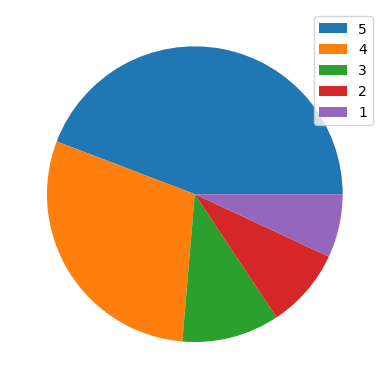

In [20]:
plt.pie(reviews.Rating.value_counts())
plt.legend(reviews.Rating.value_counts().index)

In [21]:

reviews[reviews.Rating==1].describe()

,Rating,review_len,word_length
count,1421.0,1421.000000,1421.000000
mean,1.0,769.940183,114.365236
std,0.0,687.590339,99.834855
min,1.0,77.000000,14.000000
25%,1.0,351.000000,53.000000
50%,1.0,564.000000,84.000000
75%,1.0,943.000000,139.000000
max,1.0,6511.000000,956.000000


In [22]:

reviews[reviews.Rating==2].describe()

,Rating,review_len,word_length
count,1793.0,1793.000000,1793.000000
mean,2.0,867.645287,128.598438
std,0.0,746.485926,108.258642
min,2.0,74.000000,12.000000
25%,2.0,433.000000,65.000000
50%,2.0,654.000000,97.000000
75%,2.0,1028.000000,150.000000
max,2.0,7988.000000,1111.000000


In [23]:

reviews[reviews.Rating==3].describe()

,Rating,review_len,word_length
count,2184.0,2184.000000,2184.000000
mean,3.0,785.000000,116.705586
std,0.0,744.590055,109.023017
min,3.0,47.000000,11.000000
25%,3.0,370.750000,56.000000
50%,3.0,588.000000,88.000000
75%,3.0,932.500000,136.000000
max,3.0,13501.000000,1933.000000


In [24]:

reviews[reviews.Rating==4].describe()

,Rating,review_len,word_length
count,6039.0,6039.000000,6039.000000
mean,4.0,745.688690,109.771154
std,0.0,730.521733,107.132896
min,4.0,61.000000,11.000000
25%,4.0,340.500000,51.000000
50%,4.0,539.000000,80.000000
75%,4.0,885.000000,130.000000
max,4.0,10062.000000,1460.000000


In [25]:

reviews[reviews.Rating==5].describe()

,Rating,review_len,word_length
count,9054.0,9054.000000,9054.000000
mean,5.0,661.981445,95.962889
std,0.0,627.544288,90.977128
min,5.0,44.000000,9.000000
25%,5.0,318.000000,46.000000
50%,5.0,496.000000,71.000000
75%,5.0,784.000000,113.000000
max,5.0,12762.000000,1757.000000


In [26]:
reviews

,Review,Rating,review_len,word_length
0,nice hotel expensive parking got good deal sta...,4,593,89
1,ok nothing special charge diamond member hilto...,2,1689,252
2,nice rooms not 4* experience hotel monaco seat...,3,1427,219
3,"unique, great stay, wonderful time hotel monac...",5,600,91
4,"great stay great stay, went seahawk game aweso...",5,1281,193
...,...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5,733,111
20487,great location price view hotel great quick pl...,4,306,41
20488,"ok just looks nice modern outside, desk staff ...",2,443,65
20489,hotel theft ruined vacation hotel opened sept ...,1,5557,783


In [27]:
reviews['sentiment']=0
reviews

,Review,Rating,review_len,word_length,sentiment
0,nice hotel expensive parking got good deal sta...,4,593,89,0
1,ok nothing special charge diamond member hilto...,2,1689,252,0
2,nice rooms not 4* experience hotel monaco seat...,3,1427,219,0
3,"unique, great stay, wonderful time hotel monac...",5,600,91,0
4,"great stay great stay, went seahawk game aweso...",5,1281,193,0
...,...,...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5,733,111,0
20487,great location price view hotel great quick pl...,4,306,41,0
20488,"ok just looks nice modern outside, desk staff ...",2,443,65,0
20489,hotel theft ruined vacation hotel opened sept ...,1,5557,783,0


### Taking rating 1 and 2 as negative and 4 and 5 as positive sentiment

In [28]:
reviews.loc[(reviews.Rating==4) | (reviews.Rating==5),'sentiment']=1

In [29]:
reviews=reviews[(reviews.Rating==1)|(reviews.Rating==2)|(reviews.Rating==4)|(reviews.Rating==5)]

In [30]:
reviews

,Review,Rating,review_len,word_length,sentiment
0,nice hotel expensive parking got good deal sta...,4,593,89,1
1,ok nothing special charge diamond member hilto...,2,1689,252,0
3,"unique, great stay, wonderful time hotel monac...",5,600,91,1
4,"great stay great stay, went seahawk game aweso...",5,1281,193,1
5,love monaco staff husband stayed hotel crazy w...,5,1002,136,1
...,...,...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5,733,111,1
20487,great location price view hotel great quick pl...,4,306,41,1
20488,"ok just looks nice modern outside, desk staff ...",2,443,65,0
20489,hotel theft ruined vacation hotel opened sept ...,1,5557,783,0


### number of positive and negative reviews

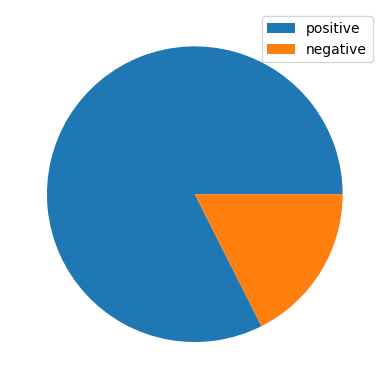

In [31]:
plt.pie(reviews.sentiment.value_counts())
plt.legend(['positive','negative'])

### Distplots of review length for positive and negative sentiments

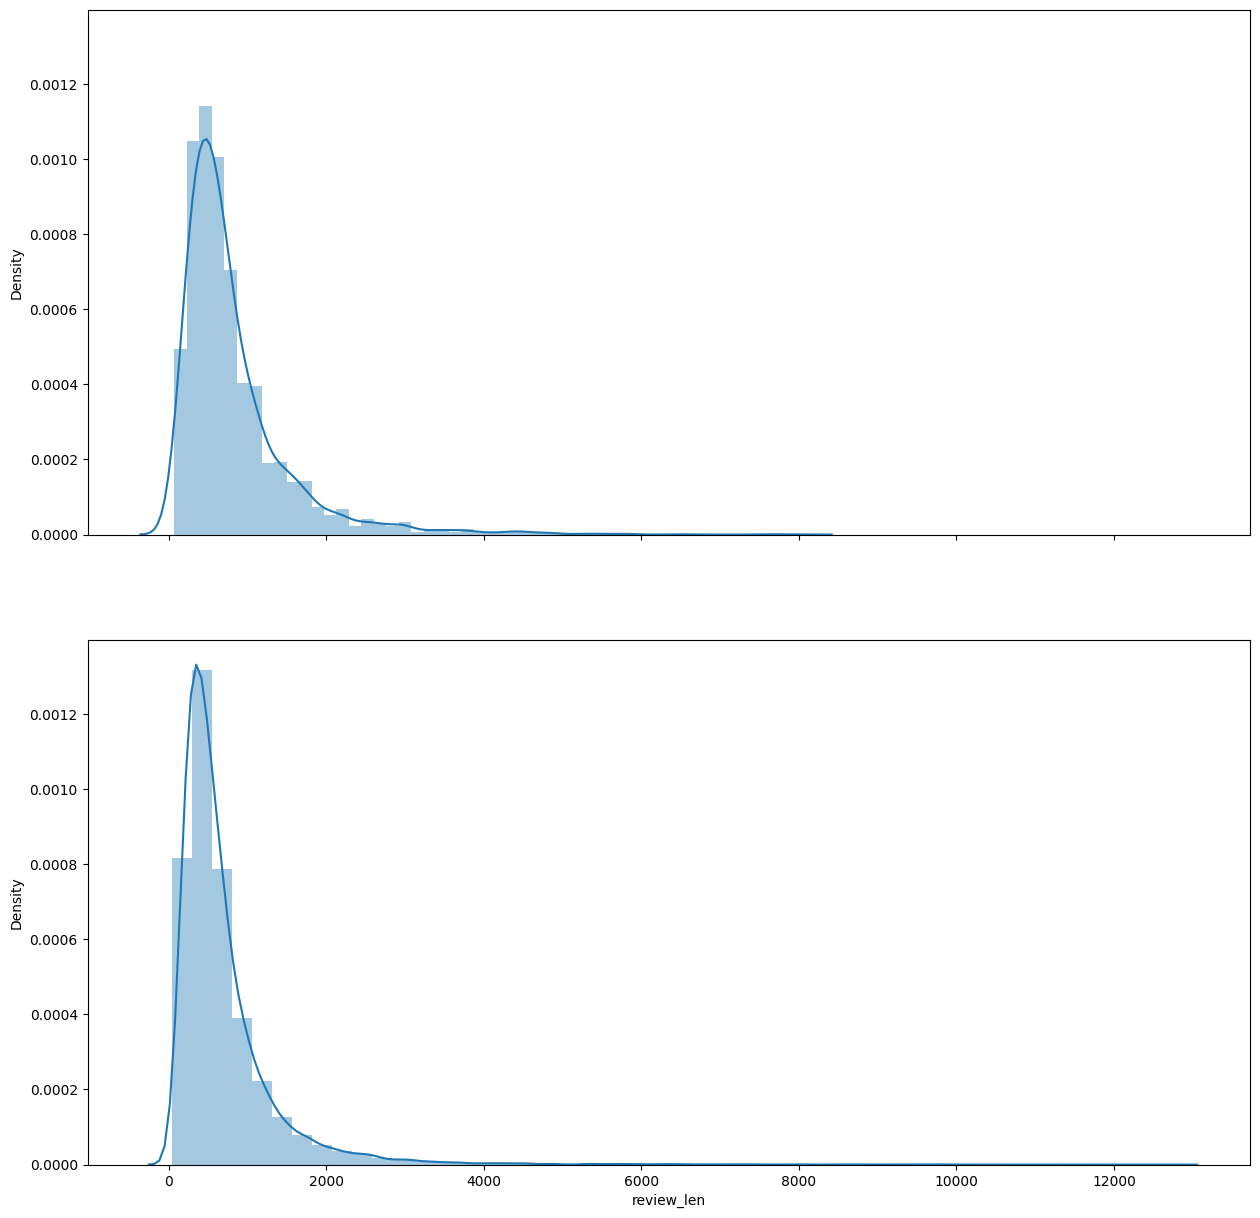

In [32]:

fig, axes = plt.subplots(2,1,sharex='col', sharey='col')
fig.set_figheight(15)
fig.set_figwidth(15)
for i in enumerate(axes):
    sns.distplot(reviews[reviews.sentiment==i[0]].iloc[:,2],ax=i[1])

### Histogram of the same

Text(0.5, 0, 'Review Length')

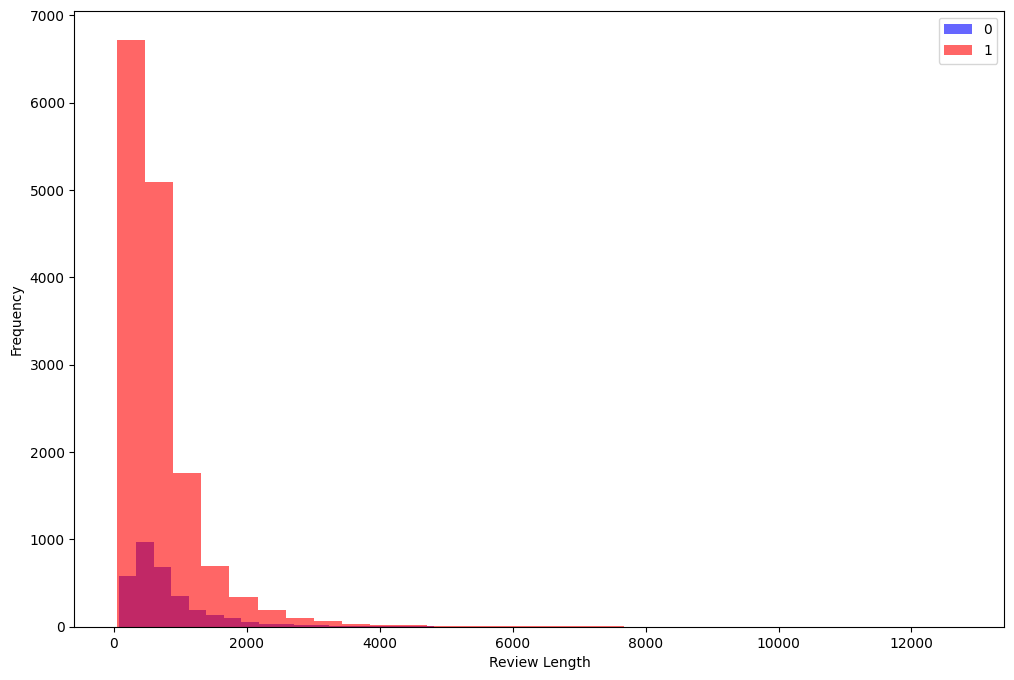

In [33]:
plt.figure(figsize=(12, 8))
colors=["red","blue"]
for i in range(2):
    reviews[reviews.sentiment==i].review_len.plot(bins=30,kind="hist",color=colors[i-1],label=i,alpha=0.6)
plt.legend()
plt.xlabel("Review Length")

### average review length for each sentiment

<BarContainer object of 2 artists>

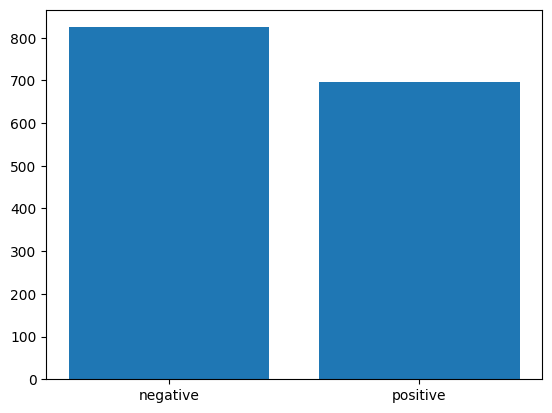

In [34]:
rating_length_sent=reviews.groupby(["sentiment"]).mean()
plt.bar(['negative','positive'],rating_length_sent.review_len)

In [35]:
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [36]:
import nltk
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()


### Defining a function to remove stopwords and lemmatizing

In [37]:
def process_text(sample_string):
    STOPWORDS=stopwords.words("english")+['nt']+['hotel']
    no_punc=[i for i in sample_string if i not in string.punctuation]
    no_punc=''.join(no_punc)
    no_punc = word_tokenize(no_punc)
    no_stop=[word for word in no_punc if word not in STOPWORDS]
    lem=[]
    for i in no_stop:
        lem.append(lemmatizer.lemmatize(i))
    return ' '.join(lem)

In [38]:
reviews

,Review,Rating,review_len,word_length,sentiment
0,nice hotel expensive parking got good deal sta...,4,593,89,1
1,ok nothing special charge diamond member hilto...,2,1689,252,0
3,"unique, great stay, wonderful time hotel monac...",5,600,91,1
4,"great stay great stay, went seahawk game aweso...",5,1281,193,1
5,love monaco staff husband stayed hotel crazy w...,5,1002,136,1
...,...,...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5,733,111,1
20487,great location price view hotel great quick pl...,4,306,41,1
20488,"ok just looks nice modern outside, desk staff ...",2,443,65,0
20489,hotel theft ruined vacation hotel opened sept ...,1,5557,783,0


In [39]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to C:\Users\Govind
[nltk_data]     S\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### applying the function to all the reviews

In [40]:
reviews["clean_text"]=reviews.Review.apply(process_text)
reviews

,Review,Rating,review_len,word_length,sentiment,clean_text
0,nice hotel expensive parking got good deal sta...,4,593,89,1,nice expensive parking got good deal stay anni...
1,ok nothing special charge diamond member hilto...,2,1689,252,0,ok nothing special charge diamond member hilto...
3,"unique, great stay, wonderful time hotel monac...",5,600,91,1,unique great stay wonderful time monaco locati...
4,"great stay great stay, went seahawk game aweso...",5,1281,193,1,great stay great stay went seahawk game awesom...
5,love monaco staff husband stayed hotel crazy w...,5,1002,136,1,love monaco staff husband stayed crazy weekend...
...,...,...,...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5,733,111,1,best kept secret 3rd time staying charm 5star ...
20487,great location price view hotel great quick pl...,4,306,41,1,great location price view great quick place si...
20488,"ok just looks nice modern outside, desk staff ...",2,443,65,0,ok look nice modern outside desk staff particu...
20489,hotel theft ruined vacation hotel opened sept ...,1,5557,783,0,theft ruined vacation opened sept 17 2007 gues...


In [41]:
from collections import Counter
words_counter=[]
words=[]
for i in range(5):
    words.append(reviews[reviews.Rating==i+1].clean_text.apply(lambda x: [word.lower() for word in x.split()]))
    words_counter.append(Counter())

    for word in words[i]:
        words_counter[i].update(word)
    


In [42]:
print(words_counter[0].most_common(50))

[('room', 4166), ('stay', 1221), ('day', 1173), ('night', 1127), ('staff', 966), ('time', 909), ('service', 873), ('place', 728), ('like', 715), ('told', 707), ('resort', 695), ('bed', 642), ('desk', 639), ('got', 629), ('food', 616), ('good', 611), ('stayed', 611), ('people', 540), ('went', 499), ('2', 476), ('beach', 473), ('booked', 450), ('bad', 437), ('water', 435), ('hour', 426), ('bathroom', 426), ('said', 423), ('restaurant', 417), ('experience', 411), ('door', 410), ('asked', 394), ('thing', 390), ('minute', 387), ('3', 385), ('pool', 375), ('reservation', 373), ('better', 369), ('nice', 365), ('problem', 363), ('small', 363), ('breakfast', 363), ('check', 362), ('guest', 361), ('manager', 360), ('really', 360), ('say', 357), ('called', 354), ('floor', 352), ('star', 345), ('worst', 343)]


In [43]:
print(words_counter[4].most_common(50))

[('room', 16800), ('great', 10676), ('staff', 7844), ('stay', 6911), ('good', 5738), ('night', 5218), ('time', 5058), ('location', 4911), ('stayed', 4817), ('day', 4806), ('nice', 4411), ('breakfast', 4360), ('service', 4355), ('restaurant', 4217), ('place', 4016), ('clean', 3850), ('excellent', 3684), ('beach', 3530), ('friendly', 3383), ('food', 3329), ('pool', 3235), ('really', 3180), ('best', 3100), ('resort', 3036), ('like', 2987), ('helpful', 2874), ('bed', 2840), ('walk', 2786), ('view', 2782), ('area', 2768), ('wonderful', 2724), ('bar', 2607), ('recommend', 2559), ('trip', 2548), ('people', 2471), ('little', 2435), ('beautiful', 2290), ('minute', 2258), ('small', 2234), ('bathroom', 2227), ('comfortable', 2186), ('2', 2122), ('loved', 2097), ('city', 2079), ('review', 2040), ('fantastic', 2035), ('got', 2002), ('make', 1987), ('floor', 1965), ('lot', 1961)]


### Most common words for each rating

In [44]:
for i in range(5):
    print("50 most common words for rating {}".format(i+1))
    print(words_counter[i].most_common(50))

50 most common words for rating 1
[('room', 4166), ('stay', 1221), ('day', 1173), ('night', 1127), ('staff', 966), ('time', 909), ('service', 873), ('place', 728), ('like', 715), ('told', 707), ('resort', 695), ('bed', 642), ('desk', 639), ('got', 629), ('food', 616), ('good', 611), ('stayed', 611), ('people', 540), ('went', 499), ('2', 476), ('beach', 473), ('booked', 450), ('bad', 437), ('water', 435), ('hour', 426), ('bathroom', 426), ('said', 423), ('restaurant', 417), ('experience', 411), ('door', 410), ('asked', 394), ('thing', 390), ('minute', 387), ('3', 385), ('pool', 375), ('reservation', 373), ('better', 369), ('nice', 365), ('problem', 363), ('small', 363), ('breakfast', 363), ('check', 362), ('guest', 361), ('manager', 360), ('really', 360), ('say', 357), ('called', 354), ('floor', 352), ('star', 345), ('worst', 343)]
50 most common words for rating 2
[('room', 5614), ('day', 1539), ('night', 1512), ('good', 1495), ('stay', 1390), ('time', 1348), ('service', 1293), ('staff

In [45]:
words[0]

15       [horrible, customer, service, stay, february, ...
32       [noise, airconditionera, standard, arranged, s...
40       [bad, choice, booked, hot, wire, called, immed...
65       [hated, inn, terrible, roomservice, horrible, ...
69       [ace, grunge, life, mold, mildew, tiny, bed, m...
                               ...                        
20421    [worst, sleep, hip, tooooo, hip, nite, club, b...
20460    [june, 08, stay, stayed, june, 666808, read, r...
20465    [stay, brought, group, february, worst, experi...
20467    [returning, la, concha, nightmare, surprising,...
20489    [theft, ruined, vacation, opened, sept, 17, 20...
Name: clean_text, Length: 1421, dtype: object

In [46]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [47]:
reviews['noun_phraces']=reviews.clean_text.apply(nlp)

In [48]:
a=[]
for i in reviews.noun_phraces:
    a.append([chunk.text for chunk in i.noun_chunks])
    

In [49]:
reviews['noun_phraces']=a

In [50]:
reviews

,Review,Rating,review_len,word_length,sentiment,clean_text,noun_phraces
0,nice hotel expensive parking got good deal sta...,4,593,89,1,nice expensive parking got good deal stay anni...,"[nice expensive parking, good deal, advice pre..."
1,ok nothing special charge diamond member hilto...,2,1689,252,0,ok nothing special charge diamond member hilto...,"[nothing special charge diamond member hilton,..."
3,"unique, great stay, wonderful time hotel monac...",5,600,91,1,unique great stay wonderful time monaco locati...,[monaco location excellent short stroll main d...
4,"great stay great stay, went seahawk game aweso...",5,1281,193,1,great stay great stay went seahawk game awesom...,"[great stay, complain room huge staff, helpful..."
5,love monaco staff husband stayed hotel crazy w...,5,1002,136,1,love monaco staff husband stayed crazy weekend...,"[love monaco staff husband, memorial service b..."
...,...,...,...,...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5,733,111,1,best kept secret 3rd time staying charm 5star ...,"[secret 3rd time, charm, time, increased estee..."
20487,great location price view hotel great quick pl...,4,306,41,1,great location price view great quick place si...,"[great location price view, street space needl..."
20488,"ok just looks nice modern outside, desk staff ...",2,443,65,0,ok look nice modern outside desk staff particu...,"[nice modern outside desk staff, particularly ..."
20489,hotel theft ruined vacation hotel opened sept ...,1,5557,783,0,theft ruined vacation opened sept 17 2007 gues...,"[theft ruined vacation, sept 17 2007 guest wee..."


In [51]:
from collections import Counter
nouns_counter=[]
noun_sentences=[]
for i in range(5):
    noun_sentences.append(reviews[reviews.Rating==i+1].noun_phraces.apply(lambda x: [word.lower() for word in x]))
    nouns_counter.append(Counter())

    for word in noun_sentences[i]:
        nouns_counter[i].update(word)

### Most common noun phraces for each rating

In [52]:
for i in range(5):
    print("50 most common words for rating {}".format(i+1))
    print(nouns_counter[i].most_common(50))

50 most common words for rating 1
[('people', 174), ('room', 172), ('nothing', 108), ('place', 102), ('desk', 68), ('money', 61), ('staff', 58), ('resort', 56), ('time', 54), ('food', 53), ('reservation', 47), ('husband', 40), ('door', 39), ('review', 39), ('bed', 38), ('problem', 36), ('help', 35), ('hotel', 26), ('dinner', 26), ('pool', 25), ('day', 25), ('fact', 24), ('check', 24), ('credit card', 22), ('none', 22), ('thing', 22), ('sleep', 20), ('donçé', 20), ('airport', 19), ('water', 19), ('wife', 18), ('god', 18), ('i', 18), ('guest', 17), ('english', 17), ('work', 17), ('book', 17), ('trip', 17), ('that', 17), ('punta cana', 17), ('bag', 15), ('manager', 15), ('reception', 14), ('luggage', 14), ('inn', 14), ('night', 14), ('refund', 13), ('shower', 13), ('restaurant', 13), ('mistake', 13)]
50 most common words for rating 2
[('people', 252), ('room', 203), ('nothing', 155), ('place', 98), ('time', 91), ('resort', 83), ('food', 77), ('money', 73), ('desk', 64), ('review', 59), ('

In [53]:
from collections import Counter
nouns_counter_sent=[]
noun_sentences_sent=[]
for i in range(2):
    noun_sentences_sent.append(reviews[reviews.sentiment==i].noun_phraces.apply(lambda x: [word.lower() for word in x]))
    nouns_counter_sent.append(Counter())

    for word in noun_sentences_sent[i]:
        nouns_counter_sent[i].update(word)

### most common words for each sentiment

In [54]:
for i in range(2):
    print("50 most common words for sentiment {}".format(i))
    print(nouns_counter_sent[i].most_common(50))

50 most common words for sentiment 0
[('people', 426), ('room', 375), ('nothing', 263), ('place', 200), ('time', 145), ('resort', 139), ('money', 134), ('desk', 132), ('food', 130), ('staff', 111), ('review', 98), ('husband', 96), ('door', 81), ('bed', 77), ('reservation', 77), ('problem', 73), ('help', 68), ('day', 67), ('thing', 66), ('pool', 66), ('english', 62), ('that', 62), ('fact', 59), ('i', 59), ('dinner', 57), ('donçé', 52), ('hotel', 46), ('wife', 46), ('service', 42), ('reception', 41), ('lot', 41), ('guest', 40), ('none', 40), ('sleep', 40), ('work', 39), ('check', 39), ('god', 39), ('punta cana', 38), ('vacation', 37), ('location', 36), ('nobody', 36), ('airport', 36), ('breakfast', 34), ('bathroom', 34), ('beach', 34), ('table', 33), ('bag', 32), ('water', 32), ('luggage', 31), ('lobby', 30)]
50 most common words for sentiment 1
[('people', 1377), ('room', 721), ('place', 594), ('staff', 539), ('time', 462), ('nothing', 448), ('resort', 424), ('review', 378), ('food', 37

In [55]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [56]:
from PIL import Image

In [57]:
reviews.clean_text

0        nice expensive parking got good deal stay anni...
1        ok nothing special charge diamond member hilto...
3        unique great stay wonderful time monaco locati...
4        great stay great stay went seahawk game awesom...
5        love monaco staff husband stayed crazy weekend...
                               ...                        
20486    best kept secret 3rd time staying charm 5star ...
20487    great location price view great quick place si...
20488    ok look nice modern outside desk staff particu...
20489    theft ruined vacation opened sept 17 2007 gues...
20490    people talking ca believe excellent rating yes...
Name: clean_text, Length: 18307, dtype: object

In [58]:
text_positive=' '.join(reviews[reviews.sentiment==1].clean_text)
text_negative=' '.join(reviews[reviews.sentiment==0].clean_text)

In [59]:
wordcloud_positive = WordCloud(stopwords = STOPWORDS,
                      collocations=True).generate(text_positive)

### wordcloud for positive sentiment

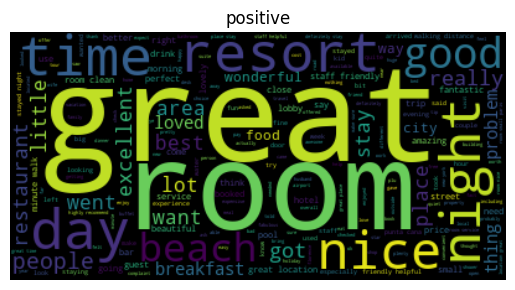

In [60]:
plt.imshow(wordcloud_positive, interpolation='bilInear')
plt.axis('off')
plt.title('positive')
plt.show()

### wordcloud for negative sentiment

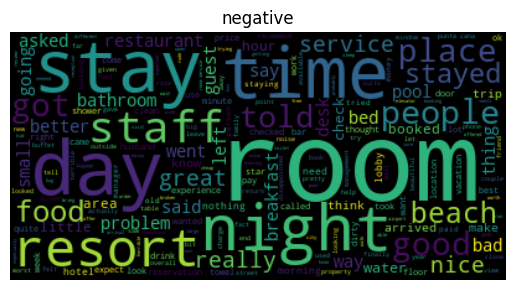

In [61]:
wordcloud_negative = WordCloud(stopwords = STOPWORDS,
                      collocations=True).generate(text_negative)
plt.imshow(wordcloud_negative, interpolation='bilInear')
plt.axis('off')
plt.title('negative')
plt.show()

In [62]:
reviews

,Review,Rating,review_len,word_length,sentiment,clean_text,noun_phraces
0,nice hotel expensive parking got good deal sta...,4,593,89,1,nice expensive parking got good deal stay anni...,"[nice expensive parking, good deal, advice pre..."
1,ok nothing special charge diamond member hilto...,2,1689,252,0,ok nothing special charge diamond member hilto...,"[nothing special charge diamond member hilton,..."
3,"unique, great stay, wonderful time hotel monac...",5,600,91,1,unique great stay wonderful time monaco locati...,[monaco location excellent short stroll main d...
4,"great stay great stay, went seahawk game aweso...",5,1281,193,1,great stay great stay went seahawk game awesom...,"[great stay, complain room huge staff, helpful..."
5,love monaco staff husband stayed hotel crazy w...,5,1002,136,1,love monaco staff husband stayed crazy weekend...,"[love monaco staff husband, memorial service b..."
...,...,...,...,...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5,733,111,1,best kept secret 3rd time staying charm 5star ...,"[secret 3rd time, charm, time, increased estee..."
20487,great location price view hotel great quick pl...,4,306,41,1,great location price view great quick place si...,"[great location price view, street space needl..."
20488,"ok just looks nice modern outside, desk staff ...",2,443,65,0,ok look nice modern outside desk staff particu...,"[nice modern outside desk staff, particularly ..."
20489,hotel theft ruined vacation hotel opened sept ...,1,5557,783,0,theft ruined vacation opened sept 17 2007 gues...,"[theft ruined vacation, sept 17 2007 guest wee..."


In [63]:
from textblob import TextBlob

### getting sentiment polarity using textblob

In [64]:
reviews['sentiment_polarity']=reviews.clean_text.apply(lambda x:TextBlob(x).sentiment.polarity)

In [65]:
reviews['sentiment_subjectivity']=reviews.clean_text.apply(lambda x:TextBlob(x).sentiment.subjectivity)

In [66]:
reviews

,Review,Rating,review_len,word_length,sentiment,clean_text,noun_phraces,sentiment_polarity,sentiment_subjectivity
0,nice hotel expensive parking got good deal sta...,4,593,89,1,nice expensive parking got good deal stay anni...,"[nice expensive parking, good deal, advice pre...",0.208744,0.687000
1,ok nothing special charge diamond member hilto...,2,1689,252,0,ok nothing special charge diamond member hilto...,"[nothing special charge diamond member hilton,...",0.235193,0.495009
3,"unique, great stay, wonderful time hotel monac...",5,600,91,1,unique great stay wonderful time monaco locati...,[monaco location excellent short stroll main d...,0.504825,0.691228
4,"great stay great stay, went seahawk game aweso...",5,1281,193,1,great stay great stay went seahawk game awesom...,"[great stay, complain room huge staff, helpful...",0.469643,0.627296
5,love monaco staff husband stayed hotel crazy w...,5,1002,136,1,love monaco staff husband stayed crazy weekend...,"[love monaco staff husband, memorial service b...",0.243056,0.614583
...,...,...,...,...,...,...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5,733,111,1,best kept secret 3rd time staying charm 5star ...,"[secret 3rd time, charm, time, increased estee...",0.218320,0.508586
20487,great location price view hotel great quick pl...,4,306,41,1,great location price view great quick place si...,"[great location price view, street space needl...",0.503704,0.622222
20488,"ok just looks nice modern outside, desk staff ...",2,443,65,0,ok look nice modern outside desk staff particu...,"[nice modern outside desk staff, particularly ...",0.171220,0.524304
20489,hotel theft ruined vacation hotel opened sept ...,1,5557,783,0,theft ruined vacation opened sept 17 2007 gues...,"[theft ruined vacation, sept 17 2007 guest wee...",0.144686,0.529950


### average sentiment polarity for each rating

In [67]:
for i in range(0,5):
    m=reviews[reviews.Rating==i+1].sentiment_polarity.mean()
    print("polarity for rating {}: {}".format(i+1,m))

polarity for rating 1: -0.016606401973778828
polarity for rating 2: 0.11883582845556183
polarity for rating 3: nan
polarity for rating 4: 0.3005871891381024
polarity for rating 5: 0.36292529549800606


### average sentiment subjectivity for each rating

In [68]:
for i in range(0,5):
    m=reviews[reviews.Rating==i+1].sentiment_subjectivity.mean()
    print("subjectivity for rating {}: {}".format(i+1,m))

subjectivity for rating 1: 0.5504472692097555
subjectivity for rating 2: 0.5416036480010517
subjectivity for rating 3: nan
subjectivity for rating 4: 0.5827955253395394
subjectivity for rating 5: 0.6111510586262805


### Average sentiment polarity for positive and negative reviews

In [69]:
for i in range(2):
    m=reviews[reviews.sentiment==i].sentiment_polarity.mean()
    print("polarity for sentiment {}: {}".format(i,m))

polarity for sentiment 0: 0.05895300037837045
polarity for sentiment 1: 0.3379826184750511


In [70]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


In [71]:
sentiment = SentimentIntensityAnalyzer()

In [72]:
reviews_vader=reviews.copy()

### sentiment analysis using VADER

In [73]:
reviews_vader['sentiment_polarity']=reviews_vader.clean_text.apply(lambda x:sentiment.polarity_scores(x)['compound'])
reviews_vader

,Review,Rating,review_len,word_length,sentiment,clean_text,noun_phraces,sentiment_polarity,sentiment_subjectivity
0,nice hotel expensive parking got good deal sta...,4,593,89,1,nice expensive parking got good deal stay anni...,"[nice expensive parking, good deal, advice pre...",0.9808,0.687000
1,ok nothing special charge diamond member hilto...,2,1689,252,0,ok nothing special charge diamond member hilto...,"[nothing special charge diamond member hilton,...",0.9946,0.495009
3,"unique, great stay, wonderful time hotel monac...",5,600,91,1,unique great stay wonderful time monaco locati...,[monaco location excellent short stroll main d...,0.9949,0.691228
4,"great stay great stay, went seahawk game aweso...",5,1281,193,1,great stay great stay went seahawk game awesom...,"[great stay, complain room huge staff, helpful...",0.9955,0.627296
5,love monaco staff husband stayed hotel crazy w...,5,1002,136,1,love monaco staff husband stayed crazy weekend...,"[love monaco staff husband, memorial service b...",0.9894,0.614583
...,...,...,...,...,...,...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5,733,111,1,best kept secret 3rd time staying charm 5star ...,"[secret 3rd time, charm, time, increased estee...",0.9872,0.508586
20487,great location price view hotel great quick pl...,4,306,41,1,great location price view great quick place si...,"[great location price view, street space needl...",0.9753,0.622222
20488,"ok just looks nice modern outside, desk staff ...",2,443,65,0,ok look nice modern outside desk staff particu...,"[nice modern outside desk staff, particularly ...",0.8655,0.524304
20489,hotel theft ruined vacation hotel opened sept ...,1,5557,783,0,theft ruined vacation opened sept 17 2007 gues...,"[theft ruined vacation, sept 17 2007 guest wee...",0.9941,0.529950


In [74]:
reviews

,Review,Rating,review_len,word_length,sentiment,clean_text,noun_phraces,sentiment_polarity,sentiment_subjectivity
0,nice hotel expensive parking got good deal sta...,4,593,89,1,nice expensive parking got good deal stay anni...,"[nice expensive parking, good deal, advice pre...",0.208744,0.687000
1,ok nothing special charge diamond member hilto...,2,1689,252,0,ok nothing special charge diamond member hilto...,"[nothing special charge diamond member hilton,...",0.235193,0.495009
3,"unique, great stay, wonderful time hotel monac...",5,600,91,1,unique great stay wonderful time monaco locati...,[monaco location excellent short stroll main d...,0.504825,0.691228
4,"great stay great stay, went seahawk game aweso...",5,1281,193,1,great stay great stay went seahawk game awesom...,"[great stay, complain room huge staff, helpful...",0.469643,0.627296
5,love monaco staff husband stayed hotel crazy w...,5,1002,136,1,love monaco staff husband stayed crazy weekend...,"[love monaco staff husband, memorial service b...",0.243056,0.614583
...,...,...,...,...,...,...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5,733,111,1,best kept secret 3rd time staying charm 5star ...,"[secret 3rd time, charm, time, increased estee...",0.218320,0.508586
20487,great location price view hotel great quick pl...,4,306,41,1,great location price view great quick place si...,"[great location price view, street space needl...",0.503704,0.622222
20488,"ok just looks nice modern outside, desk staff ...",2,443,65,0,ok look nice modern outside desk staff particu...,"[nice modern outside desk staff, particularly ...",0.171220,0.524304
20489,hotel theft ruined vacation hotel opened sept ...,1,5557,783,0,theft ruined vacation opened sept 17 2007 gues...,"[theft ruined vacation, sept 17 2007 guest wee...",0.144686,0.529950


### Boxplot of TextBlob sentiment polarity for each rating

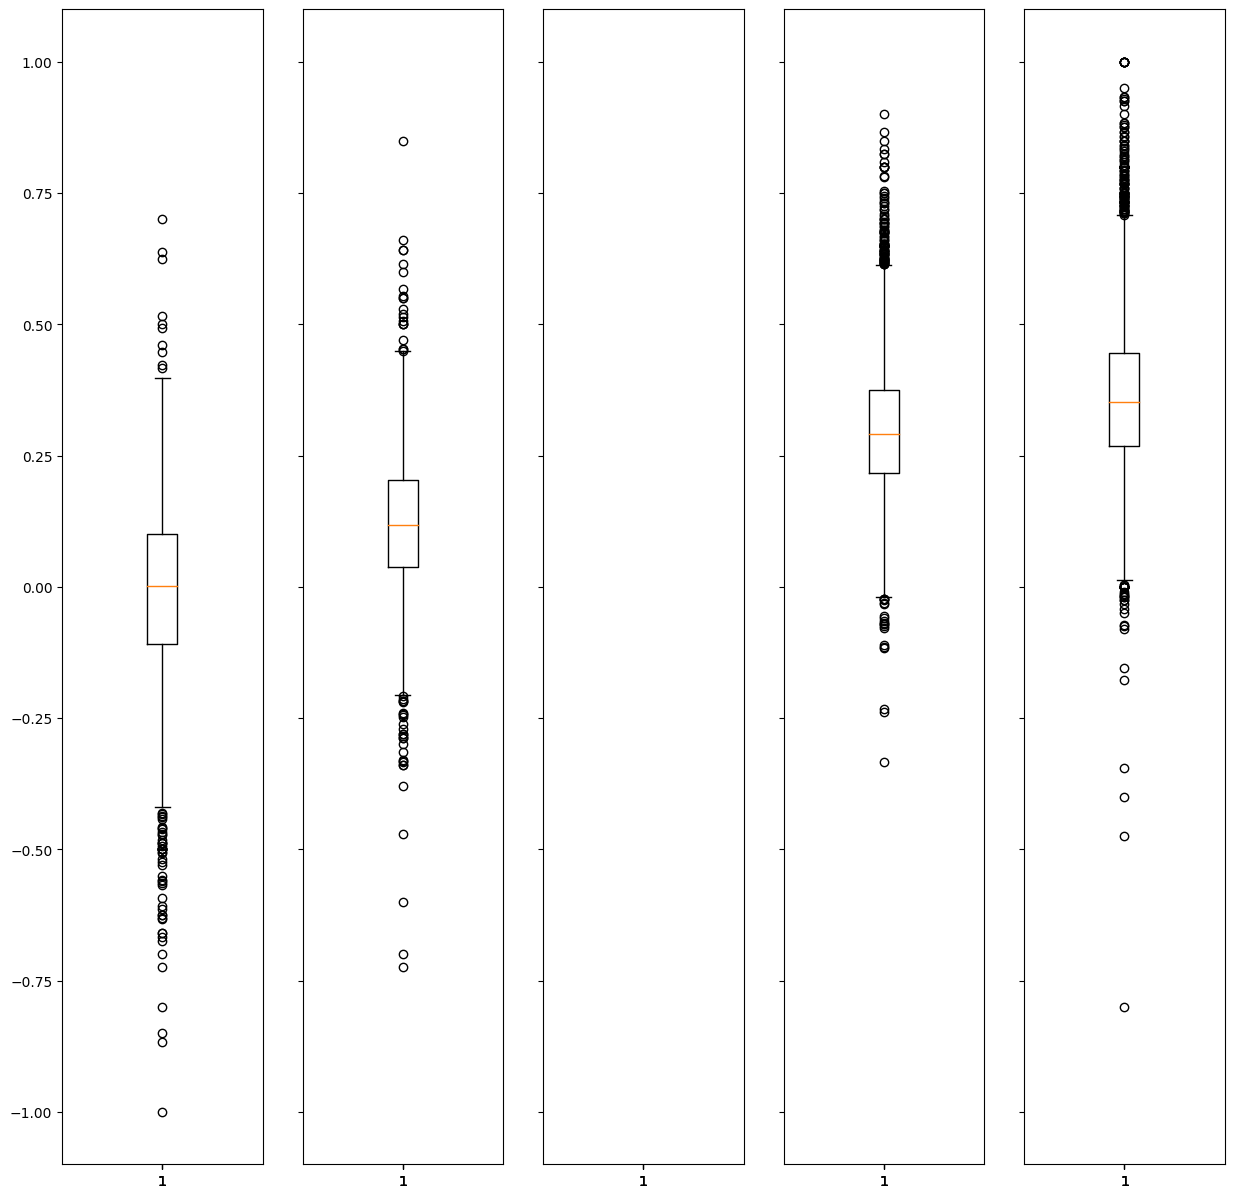

In [75]:
fig, axes = plt.subplots(1,5,sharex='row', sharey='row')
fig.set_figheight(15)
fig.set_figwidth(15)
for i in enumerate(axes):
    i[1].boxplot(reviews[reviews.Rating==i[0]+1].sentiment_polarity)

### Boxplot of VADER sentiment polarity for each rating

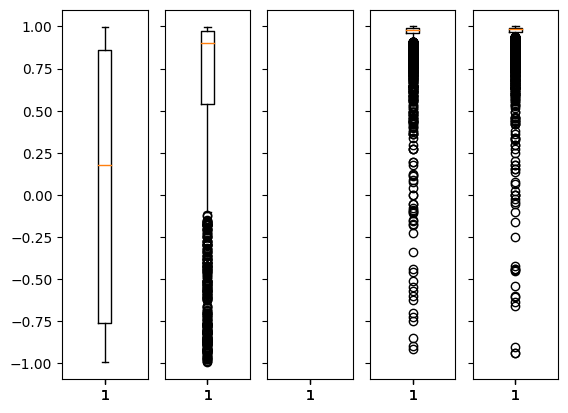

In [76]:
fig, axes = plt.subplots(1,5,sharex='row', sharey='row')
for i in enumerate(axes):
    i[1].boxplot(reviews_vader[reviews_vader.Rating==i[0]+1].sentiment_polarity)


In [77]:
for i in range(0,5):
    m=reviews_vader[reviews_vader.Rating==i+1].sentiment_polarity.mean()
    print("polarity for rating {}: {}".format(i+1,m))

polarity for rating 1: 0.06254919071076706
polarity for rating 2: 0.612188176240937
polarity for rating 3: nan
polarity for rating 4: 0.9527474250703759
polarity for rating 5: 0.96547221117738


### Average VADER polarity for positive and negative reviews

In [78]:
for i in range(2):
    m=reviews_vader[reviews_vader.sentiment==i].sentiment_polarity.mean()
    print("polarity for sentiment {}: {}".format(i,m))

polarity for sentiment 0: 0.36917728686994394
polarity for sentiment 1: 0.9603807791691512


In [79]:
x = reviews.clean_text
y = reviews.sentiment
print(x.shape)
print(y.shape)

(18307,)
(18307,)


### train-test split

In [80]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(13730,)
(4577,)
(13730,)
(4577,)


In [81]:
train_pre_resampling=pd.concat([x_train,y_train],axis=1)

In [82]:
train_pre_resampling.sentiment.value_counts()

1    11298
0     2432
Name: sentiment, dtype: int64

### Since the data is imbalanced, rebalcing the data using oversampling

In [83]:
from sklearn import utils
resampled_negative=utils.resample(train_pre_resampling[train_pre_resampling.sentiment==0],replace=True,n_samples=11298)

In [84]:
train=pd.concat([resampled_negative,train_pre_resampling[train_pre_resampling.sentiment==1]])
train

,clean_text,sentiment
19679,small double cupboard double room compact unde...,0
11068,fivestar price threestar rincon beach resort c...,0
5917,crawling cochroaches priced dirty bed extremel...,0
2745,past sell date wife returned 6th visit resort ...,0
15743,3 star room good pool area lobby pool area loo...,0
...,...,...
12324,delightful offering superb value husband spent...,1
19355,place needed place crash night hong kong fligh...,1
5837,book sofitel stayed sofitel 7 day 15yr end aug...,1
13666,fabulous stayed senator gran 16th 17th march 2...,1


In [85]:
x_train=train.clean_text
y_train=train.sentiment

### Using count vectorizer

In [86]:
from sklearn.feature_extraction.text import CountVectorizer

# instantiate the vectorizer
vect = CountVectorizer()
vect.fit(x_train)

CountVectorizer()

In [87]:
x_train_dtm = vect.transform(x_train)

In [88]:
x_train_dtm

<22596x59001 sparse matrix of type '<class 'numpy.int64'>'
	with 1836512 stored elements in Compressed Sparse Row format>

In [89]:
x_test_dtm = vect.transform(x_test)
x_test_dtm

<4577x59001 sparse matrix of type '<class 'numpy.int64'>'
	with 341940 stored elements in Compressed Sparse Row format>

### Using tfidf

In [90]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()
tfidf_transformer.fit(x_train_dtm)
x_train_dtm=tfidf_transformer.transform(x_train_dtm)

In [91]:
x_train_dtm

<22596x59001 sparse matrix of type '<class 'numpy.float64'>'
	with 1836512 stored elements in Compressed Sparse Row format>

In [92]:
x_test_dtm=tfidf_transformer.transform(x_test_dtm)
x_test_dtm

<4577x59001 sparse matrix of type '<class 'numpy.float64'>'
	with 341940 stored elements in Compressed Sparse Row format>

### Model building using multinomial naive bayes 

In [93]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()


In [94]:
%time nb.fit(x_train_dtm, y_train)

CPU times: total: 15.6 ms
Wall time: 17.2 ms


MultinomialNB()

In [95]:
y_pred_class = nb.predict(x_test_dtm)

In [96]:
from sklearn import metrics

In [97]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

0.9211273760104872

### Results

In [98]:

print(metrics.classification_report(y_test, y_pred_class))
print("Confusion Matrix")
print(metrics.confusion_matrix(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.71      0.91      0.80       782
           1       0.98      0.92      0.95      3795

    accuracy                           0.92      4577
   macro avg       0.84      0.92      0.87      4577
weighted avg       0.93      0.92      0.92      4577

Confusion Matrix
[[ 714   68]
 [ 293 3502]]


In [99]:
accuracy={}
f1_score={}
accuracy['Naive Bayes']=metrics.accuracy_score(y_test, y_pred_class)
f1_score['Naive Bayes']=metrics.f1_score(y_test, y_pred_class)

### Using LGBM

In [100]:
import lightgbm as lgb

In [101]:
x_train_dtm=x_train_dtm.astype('float')
y_train=y_train.astype('float')
x_test_dtm=x_test_dtm.astype('float')
y_test=y_test.astype('float')

In [102]:
from sklearn.model_selection import GridSearchCV,KFold
kfold=KFold(n_splits=5)

### Doing hyper-parameter tuning

In [102]:
lgbm=lgb.LGBMClassifier()
params=[{'n_estimators':range(64,128),'learning_rate':[0.1,0.2,0.05]}]
gslgb=GridSearchCV(lgbm,params,scoring='f1',n_jobs=-1,cv=kfold)
%time gslgb.fit(x_train_dtm,y_train)

CPU times: total: 2min 21s
Wall time: 59min 43s


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LGBMClassifier(), n_jobs=-1,
             param_grid=[{'learning_rate': [0.1, 0.2, 0.05],
                          'n_estimators': range(64, 128)}],
             scoring='f1')

In [103]:
gslgb.best_params_

{'learning_rate': 0.2, 'n_estimators': 125}

### Building model with the best parameters

In [103]:
lgbm_model=lgb.LGBMClassifier(learning_rate=0.2,n_estimators=125)
lgbm_model.fit(x_train_dtm,y_train)

LGBMClassifier(learning_rate=0.2, n_estimators=125)

In [104]:
y_pred_class_lgbm = lgbm_model.predict(x_test_dtm)

### Results

In [105]:
print(metrics.classification_report(y_test, y_pred_class_lgbm))
print("Confusion Matrix")
print(metrics.confusion_matrix(y_test, y_pred_class_lgbm))

              precision    recall  f1-score   support

         0.0       0.86      0.84      0.85       782
         1.0       0.97      0.97      0.97      3795

    accuracy                           0.95      4577
   macro avg       0.91      0.91      0.91      4577
weighted avg       0.95      0.95      0.95      4577

Confusion Matrix
[[ 658  124]
 [ 108 3687]]


In [141]:
accuracy['LGBM']=metrics.accuracy_score(y_test, y_pred_class_lgbm)
f1_score['LGBM']=metrics.f1_score(y_test, y_pred_class_lgbm)

### Feature importance plot

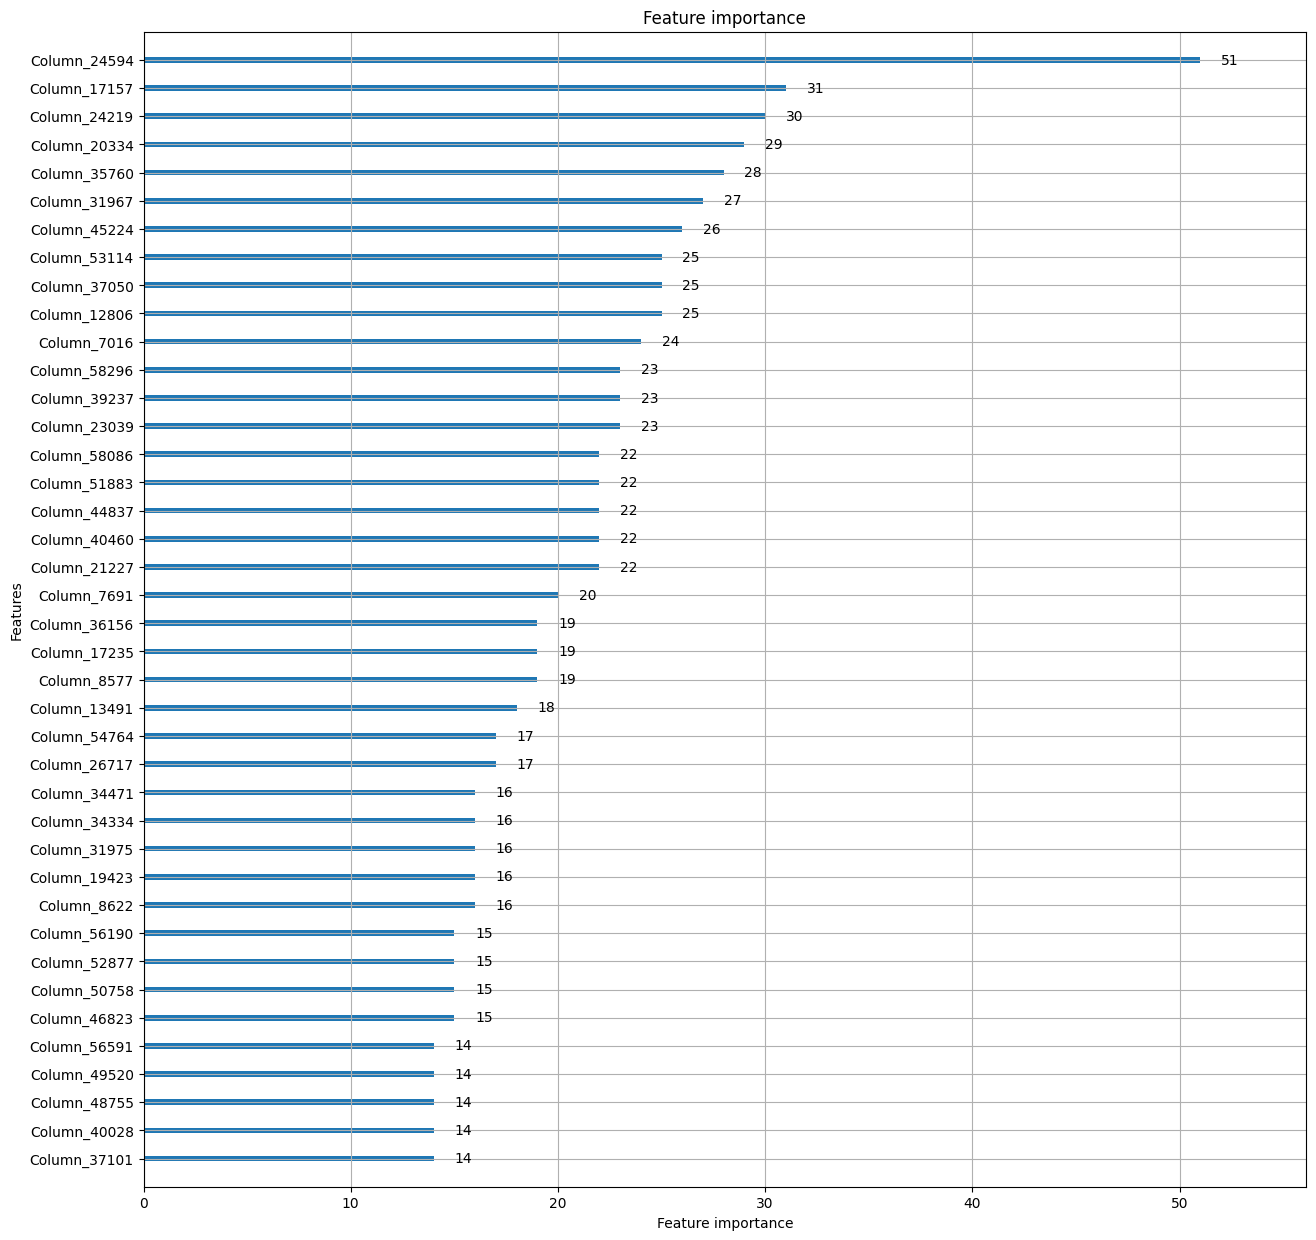

In [108]:
ax = lgb.plot_importance(lgbm_model, max_num_features=40, figsize=(15,15))
plt.show()

In [109]:
ind = np.argpartition(lgbm_model.feature_importances_, -10)[-10:]
ind

array([12806, 37050, 53114, 45224, 20334, 17157, 31967, 24594, 35760,
       24219], dtype=int64)

In [110]:
lgbm_model.feature_importances_[ind]

array([25, 25, 25, 26, 29, 31, 27, 51, 28, 30])

In [111]:
best_features=[]
for i in ind:
    best_features.append(list(vect.vocabulary_.keys())[list(vect.vocabulary_.values()).index(i)])
best_features

['clean',
 'ok',
 'told',
 'rude',
 'excellent',
 'dirty',
 'loved',
 'great',
 'nice',
 'good']

In [112]:
importance_data=pd.DataFrame({
    'word':best_features,'importance':lgbm_model.feature_importances_[ind]
},index=ind)
importance_data

,word,importance
12806,clean,25
37050,ok,25
53114,told,25
45224,rude,26
20334,excellent,29
17157,dirty,31
31967,loved,27
24594,great,51
35760,nice,28
24219,good,30


In [113]:
importance_data.sort_values(by='importance',ascending=False,inplace=True)

### important features

<BarContainer object of 10 artists>

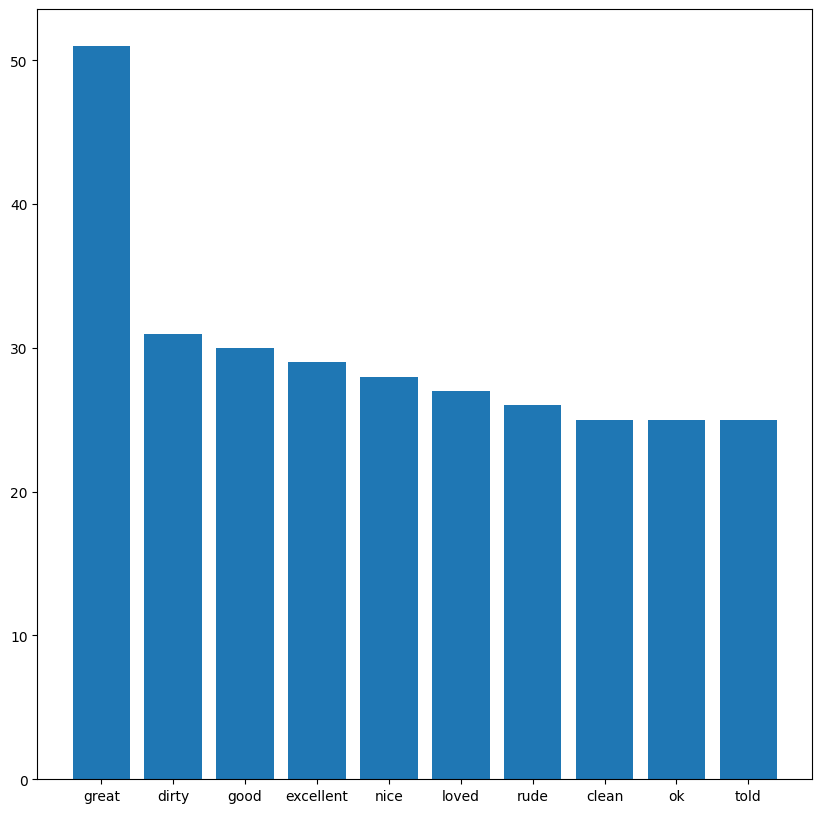

In [114]:
plt.figure(figsize=(10,10))
plt.bar(importance_data['word'],importance_data['importance'])

In [115]:
x_train_dtm=x_train_dtm.astype('float')
y_train=y_train.astype('float')
x_test_dtm=x_test_dtm.astype('float')
y_test=y_test.astype('float')

### logistic regression

In [107]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear')

In [108]:
%time logreg.fit(x_train_dtm, y_train)

CPU times: total: 281 ms
Wall time: 295 ms


LogisticRegression(solver='liblinear')

In [109]:
y_pred_class_log = logreg.predict(x_test_dtm)

In [110]:
metrics.accuracy_score(y_test, y_pred_class_log)


0.9486563251037797

In [111]:
metrics.f1_score(y_test, y_pred_class_log)


0.9686206436106289

### results

In [112]:
print(metrics.classification_report(y_test, y_pred_class_log))
print("Confusion Matrix")
print(metrics.confusion_matrix(y_test, y_pred_class_log))

              precision    recall  f1-score   support

         0.0       0.81      0.91      0.86       782
         1.0       0.98      0.96      0.97      3795

    accuracy                           0.95      4577
   macro avg       0.90      0.94      0.91      4577
weighted avg       0.95      0.95      0.95      4577

Confusion Matrix
[[ 715   67]
 [ 168 3627]]


In [142]:
accuracy['Logistic Regresssion']=metrics.accuracy_score(y_test, y_pred_class_log)
f1_score['Logistic Regression']=metrics.f1_score(y_test, y_pred_class_log)

### Random forest

In [115]:
from sklearn.ensemble import RandomForestClassifier

In [123]:
rf=RandomForestClassifier()

In [124]:
%time rf.fit(x_train_dtm, y_train)

CPU times: total: 1min 3s
Wall time: 1min 3s


RandomForestClassifier()

In [125]:
y_pred_class_rf = rf.predict(x_test_dtm)

In [126]:
metrics.accuracy_score(y_test, y_pred_class_rf)

0.9213458597334498

In [93]:
from sklearn.model_selection import GridSearchCV,KFold
kfold=KFold(n_splits=5)

### hyper parameter tuning

In [128]:
params={'n_estimators':range(64,129)}
gsrf=GridSearchCV(rf,params,scoring='accuracy',n_jobs=-1,cv=kfold)
%time gsrf.fit(x_train_dtm,y_train)

CPU times: total: 1min 4s
Wall time: 48min 59s


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'n_estimators': range(64, 129)}, scoring='accuracy')

In [132]:
gsrf.best_params_

{'n_estimators': 119}

In [133]:
gsrf.best_score_

0.9159875996457041

### building model with the best parameters

In [116]:
rf_2=RandomForestClassifier(n_estimators=119)

In [117]:
%time rf_2.fit(x_train_dtm, y_train)

CPU times: total: 1min 16s
Wall time: 1min 16s


RandomForestClassifier(n_estimators=119)

In [118]:
y_pred_class_rf = rf_2.predict(x_test_dtm)

In [119]:
metrics.accuracy_score(y_test, y_pred_class_rf)

0.9158837666593839

In [120]:
metrics.f1_score(y_test, y_pred_class_rf)

0.9515296487473246

### Results

In [121]:
print(metrics.classification_report(y_test, y_pred_class_rf))
print("Confusion Matrix")
print(metrics.confusion_matrix(y_test, y_pred_class_rf))

              precision    recall  f1-score   support

         0.0       0.96      0.53      0.68       782
         1.0       0.91      1.00      0.95      3795

    accuracy                           0.92      4577
   macro avg       0.94      0.76      0.82      4577
weighted avg       0.92      0.92      0.91      4577

Confusion Matrix
[[ 413  369]
 [  16 3779]]


In [143]:
accuracy['Random Forest']=metrics.accuracy_score(y_test, y_pred_class_rf)
f1_score['Random Forest']=metrics.f1_score(y_test, y_pred_class_rf)

In [104]:
ind = np.argpartition(rf_2.feature_importances_, -10)[-10:]
ind

array([49309, 12804, 53126, 24593, 58306, 58095, 31607, 20331, 17155,
       31973], dtype=int64)

In [105]:
rf_2.feature_importances_[ind]

array([0.00672545, 0.00757056, 0.00709555, 0.01995517, 0.007494  ,
       0.00809899, 0.00790684, 0.00828526, 0.0086936 , 0.00773071])

In [106]:
best_features=[]
for i in ind:
    best_features.append(list(vect.vocabulary_.keys())[list(vect.vocabulary_.values()).index(i)])
best_features

['staff',
 'clean',
 'told',
 'great',
 'worst',
 'wonderful',
 'location',
 'excellent',
 'dirty',
 'loved']

In [109]:
importance_data_rf=pd.DataFrame({
    'word':best_features,'importance':rf_2.feature_importances_[ind]
},index=ind)
importance_data_rf

,word,importance
49309,staff,0.006725
12804,clean,0.007571
53126,told,0.007096
24593,great,0.019955
58306,worst,0.007494
58095,wonderful,0.008099
31607,location,0.007907
20331,excellent,0.008285
17155,dirty,0.008694
31973,loved,0.007731


In [110]:
importance_data_rf.sort_values(by='importance',ascending=False,inplace=True)

### Important features

<BarContainer object of 10 artists>

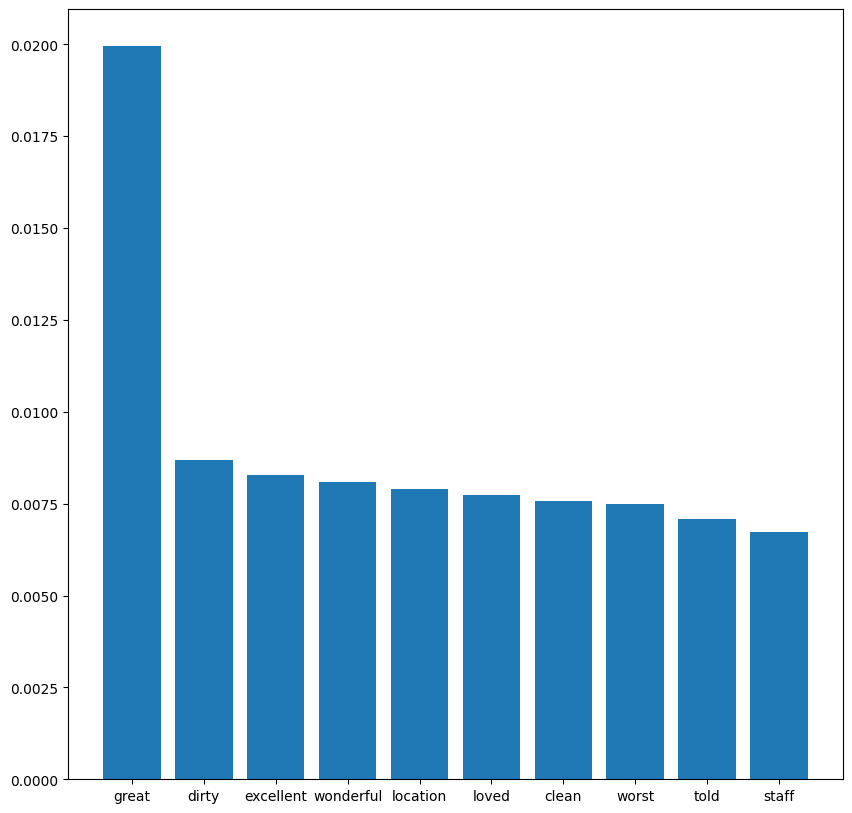

In [112]:
plt.figure(figsize=(10,10))
plt.bar(importance_data_rf['word'],importance_data_rf['importance'])


### SVM

In [94]:
from sklearn.svm import SVC
svm=SVC()

In [114]:
from sklearn.model_selection import GridSearchCV,KFold
kfold=KFold(n_splits=5)

### Hyper-parameter tuning

In [115]:
params=[{'kernel':['rbf'],'gamma':[100,50,0.5,0.1,0.01,0.001,0.0001],
               'C':[15,14,13,12,11,10,0.1,0.001,0.0001]}]
gssvm=GridSearchCV(svm,params,scoring='accuracy',n_jobs=-1,cv=kfold)
%time gssvm.fit(x_train_dtm,y_train)

CPU times: total: 5min 9s
Wall time: 2h 57min 19s


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [15, 14, 13, 12, 11, 10, 0.1, 0.001, 0.0001],
                          'gamma': [100, 50, 0.5, 0.1, 0.01, 0.001, 0.0001],
                          'kernel': ['rbf']}],
             scoring='accuracy')

In [118]:
gssvm.best_params_

{'C': 15, 'gamma': 0.5, 'kernel': 'rbf'}

### Building a model with the best parameters

In [95]:
svm_model=SVC(kernel='rbf',gamma=0.5,C=15)
%time svm_model.fit(x_train_dtm,y_train)

CPU times: total: 5min 29s
Wall time: 5min 30s


SVC(C=15, gamma=0.5)

In [96]:
y_pred_class_svm = svm_model.predict(x_test_dtm)

In [97]:
from sklearn import metrics

### Results

In [98]:
print(metrics.classification_report(y_test, y_pred_class_svm))
print("Confusion Matrix")
print(metrics.confusion_matrix(y_test, y_pred_class_svm))

              precision    recall  f1-score   support

           0       0.92      0.83      0.87       782
           1       0.97      0.98      0.97      3795

    accuracy                           0.96      4577
   macro avg       0.94      0.91      0.92      4577
weighted avg       0.96      0.96      0.96      4577

Confusion Matrix
[[ 649  133]
 [  59 3736]]


In [99]:
print(metrics.recall_score(y_test, y_pred_class_svm))

0.9844532279314888


In [144]:
accuracy['SVM']=metrics.accuracy_score(y_test, y_pred_class_svm)
f1_score['SVM']=metrics.f1_score(y_test, y_pred_class_svm)

### KNN

In [129]:
from sklearn.neighbors import KNeighborsClassifier

In [130]:
knn=KNeighborsClassifier()

### hyper-parameter tuning

In [125]:
params=[{'n_neighbors':range(1,101),'weights':['uniform','distance']}]
gsknn=GridSearchCV(knn,params,scoring='accuracy',n_jobs=-1,cv=kfold)
%time gsknn.fit(x_train_dtm,y_train)

CPU times: total: 14.5 s
Wall time: 19min 27s


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid=[{'n_neighbors': range(1, 101),
                          'weights': ['uniform', 'distance']}],
             scoring='accuracy')

In [126]:
gsknn.best_params_

{'n_neighbors': 1, 'weights': 'uniform'}

### Building a model using the best parameters

In [131]:
knn_model=KNeighborsClassifier(n_neighbors=1)
knn_model.fit(x_train_dtm,y_train)

KNeighborsClassifier(n_neighbors=1)

In [132]:
y_pred_class_knn = knn_model.predict(x_test_dtm)

### Results

In [133]:
print(metrics.classification_report(y_test, y_pred_class_knn))
print("Confusion Matrix")
print(metrics.confusion_matrix(y_test, y_pred_class_knn))

              precision    recall  f1-score   support

         0.0       0.63      0.40      0.49       782
         1.0       0.89      0.95      0.92      3795

    accuracy                           0.86      4577
   macro avg       0.76      0.68      0.70      4577
weighted avg       0.84      0.86      0.84      4577

Confusion Matrix
[[ 314  468]
 [ 186 3609]]


In [145]:
accuracy['KNN']=metrics.accuracy_score(y_test, y_pred_class_knn)
f1_score['KNN']=metrics.f1_score(y_test, y_pred_class_knn)

In [146]:
accuracy

{'Naive Bayes': 0.9211273760104872,
 'LGBM': 0.9493117762726677,
 'Logistic Regresssion': 0.9486563251037797,
 'Random Forest': 0.9158837666593839,
 'SVM': 0.9587065763600612,
 'KNN': 0.8571116451824339}

### Accuracy and f1 score of the models

In [147]:
pd.DataFrame({
    "model":accuracy.keys(),
    "accuracy":accuracy.values(),
    "f1 score":f1_score.values()
})

,model,accuracy,f1 score
0,Naive Bayes,0.921127,0.950984
1,LGBM,0.949312,0.969498
2,Logistic Regresssion,0.948656,0.968621
3,Random Forest,0.915884,0.951530
4,SVM,0.958707,0.975342
5,KNN,0.857112,0.916921


### Since SVM has the best accuracy and f1 score, it is selected for deployment

In [150]:
import joblib
joblib.dump(lgbm_model,'model_lgbm.sav')
joblib.dump(vect,'vect.sav')
joblib.dump(tfidf_transformer,'tfidf_transformer.sav')
joblib.dump(svm_model,'model_svm.sav')

['model_svm.sav']